In [ ]:
# Copyright (C) 2024 Takaaki Shiotani

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.

- 塩谷が「あ」「い」「う」「え」「お」と発話した音声データに対し、波形とフォルマントをplotする
- parselmouth(praatのPython wrapper)のburg法を利用してフォルマントを計算

In [1]:
import matplotlib.pyplot as plt
import parselmouth
import seaborn as sns
import torch

torch.set_num_threads(1)
sns.set_theme()

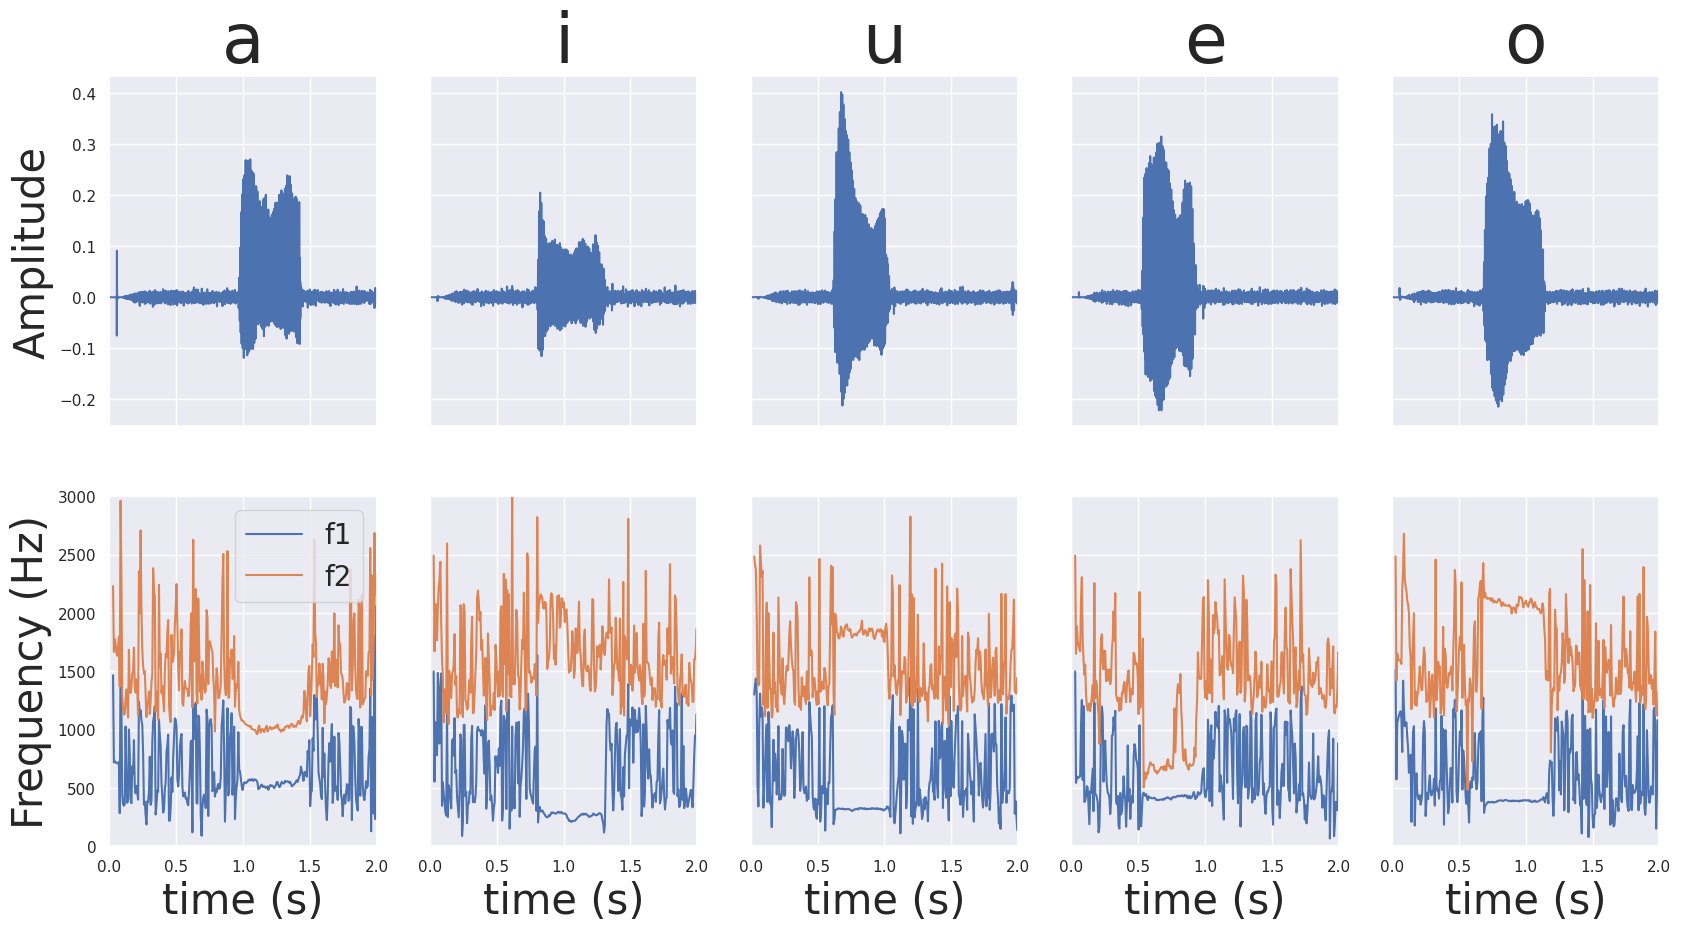

In [3]:
chars = ["a", "i", "u", "e", "o"]
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex="all", sharey="row")
for i, char in enumerate(chars):
    path = f"../../data/aiueo/{char}.wav"
    sound = parselmouth.Sound(path)
    axs[0, i].plot(sound.xs(), sound.values.T)  # noqa: PD011
    axs[0, i].set_title(char, fontsize=50)
    axs[0, i].set_xlim(0, 2)
    axs[0, 0].set_ylabel("Amplitude", fontsize=30)
    formant = sound.to_formant_burg()
    f1 = [
        formant.get_value_at_time(1, formant.xs()[j]) for j in range(len(formant.xs()))
        ]
    f2 = [
        formant.get_value_at_time(2, formant.xs()[j]) for j in range(len(formant.xs()))
        ]
    axs[1, i].plot(formant.xs(), f1, label="f1")
    axs[1, i].plot(formant.xs(), f2, label="f2")
    axs[1, 0].legend(fontsize=20)
    axs[1, i].set_ylim(0, 3000)
    axs[1, i].set_xlim(0, 2)
    axs[1, i].set_xlabel("time (s)", fontsize=30)
    axs[1, 0].set_ylabel("Frequency (Hz)", fontsize=30)


